In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'D:\\prog\\python\\TOV\\TOV'

In [3]:
dat =np.loadtxt(fname ="walmod_x3_x4_Lm_asym.txt")

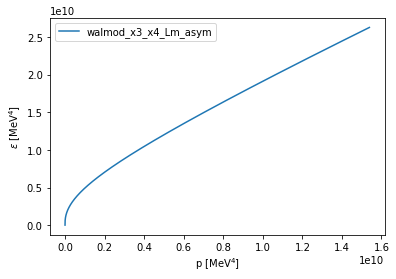

In [31]:
#plot eos
fig = plt.figure()
eos = fig.add_subplot(1,1,1)
eos.set_xlabel("p [$\mathrm{MeV}^4$]")
eos.set_ylabel("$\epsilon$ [$\mathrm{MeV}^4$]")
eos.plot(dat[::,2],dat[::,1],label="walmod_x3_x4_Lm_asym")
plt.legend()
plt.show(fig)

In [32]:
from scipy.interpolate import interp1d

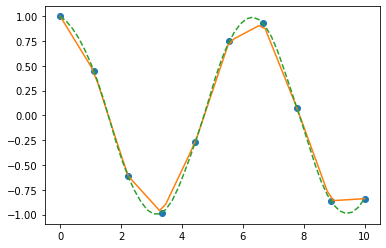

In [46]:
#Example for interpolating function
x = np.linspace(0,10,10)
y = np.cos(x)
f = interp1d(x,y)
x2 = np.linspace(0,10,50)
f2=interp1d(x,y,kind ='quadratic')
plt.plot(x,y,"o",x2,f(x2),'-',x2,f2(x2),'--')
plt.show()


In [57]:
#We need the function and its inverse too, so I will check which is the better way to treat them
#interpolate the data and inverse data separately
p = dat[::,2]
e = dat[::,1]
ep = interp1d(p,e,'quadratic')
pe = interp1d(e,p,'quadratic')
#test points are not on the grid
tp1 = p[20] + (p[21]-p[20])/2
te1 = ep(tp1)
(pe(ep(tp1))-tp1)/tp1
#the relative error is small if we fit this way, and it is zero with linear interpolation

#a relevant question is which interpolation should be used during the calculations (this optin must be used an external parameter)
# another problem is that which interpolation should be canonical p(e) or e(p) 
# what can be done is that we make the choosen interpolation consistent by definity p(e) as the exact inverse of e(p)

-3.7415401821191903e-07

In [79]:
#interpoalate only one way and define exact inverse
from scipy import optimize

def aux(pv,ev):
    return ep(pv)-ev

def epinv(eva):
    return optimize.newton(aux,pe(eva),args=(eva,))
#check the resulst with the above numbers

(epinv(te1) - tp1)/tp1

#this is exact now, but it requires the pe interpolation funciton and a numerical solver to get that small discrepancy between 
# pe and ep right. 
# based on these findings we really should use linear interpolatin because that behaves the best. (linear inverse is linear)
# and it introduces not plus information into the EoS (like spline)
#however we need further testing  on this, so in the main program the we should leave the pe and ep functions as 
# separate functions and we provide these externally for testing (and execution time testing)
#we should also check the effect of interpolation order

0.0

In [80]:
#this part is about how to covnert the EoS into km units

#physical constants needed
MSun=1.4766 #Mass of the Sun in km units
f = 197.327 #197 Mev * fm = 1 
e0conv = 1.32E-3 # 1 GeV fm^-3 = 1.32 e - 3 km^-2*

#the standatd imput is data in three columns {density [fm^-3] , energy density [MeV^4] , pressure  p [MeV^4]}

#the first column is not needed for the TOV-solver
# energy density and pressure is in the same units, the conversion is the same
# 1) x Mev^4 = x MeV * (1/197 fm)^3 = x * 197^{-3} MeV/fm^3m  -> x * f^-3 converts to MeV/fm^3
# 2) MeV/fm^3 * 0.001 converts to GeV/fm^3
# 3) y GeV/fm^3 = y (1.32E-3) km^-2  -> y * e0conv converts to km^-2 units
# so pressure and energy density values should be converted to km^-2 units from MeV^4 by multiplying them with 
# f^-3 * 0.001 * e0conv

0.0132